In [25]:
# Ch1

In [20]:
import numpy as np
import matplotlib.pyplot as plt

## 1.4 バンディットアルゴリズムの実装

In [5]:
class Bandit:
    def __init__(self, arms=10):
        self.rates = np.random.rand(arms)
    
    def play(self, arm):
        rate = self.rates[arm]
        if rate > np.random.rand():
            return 1
        else:
            return 0

In [8]:
bandit = Bandit()
for i in range(3):
    print(bandit.play(0))

1
1
1


In [9]:
bandit = Bandit()
Q=0

for n in range(1, 11):
    reward = bandit.play(0)
    Q += (reward - Q)/n   
    print(Q)

0.0
0.5
0.6666666666666666
0.5
0.4
0.33333333333333337
0.4285714285714286
0.5
0.4444444444444444
0.5


In [14]:
bandit = Bandit()
Qs = np.zeros(10)
ns = np.zeros(10)

for n in range(10):
    action = np.random.randint(0, 10)
    reward = bandit.play(action)
    
    ns[action] += 1
    Qs[action] += (reward - Qs[action])/ns[action] 
    print(Qs)

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[0.  0.  0.  0.  0.  0.  0.  0.5 0.  0. ]
[0.  0.  0.  0.  0.  0.  0.  0.5 0.  1. ]
[0.  1.  0.  0.  0.  0.  0.  0.5 0.  1. ]
[0.  1.  0.  0.  0.  0.  0.  0.5 1.  1. ]
[0.         1.         0.         0.         0.         0.
 0.         0.66666667 1.         1.        ]
[0.   1.   0.   0.   0.   0.   0.   0.75 1.   1.  ]
[1.   1.   0.   0.   0.   0.   0.   0.75 1.   1.  ]
[1.   1.   0.   0.   0.   0.   0.   0.75 1.   1.  ]
[1.   1.   1.   0.   0.   0.   0.   0.75 1.   1.  ]


In [17]:
class Agent:
    def __init__(self, epsilon, action_size=10):
        self.epsilon = epsilon
        self.Qs = np.zeros(action_size)
        self.ns = np.zeros(action_size)
        
    def update(self, action, reward):
        self.ns[action] += 1
        self.Qs[action] += (reward - self.Qs[action])/self.ns[action]
        
    def get_action(self):
        if np.random.rand() < self.epsilon:
            return np.random.randint(0, len(self.Qs))
        return np.argmax(self.Qs)

832


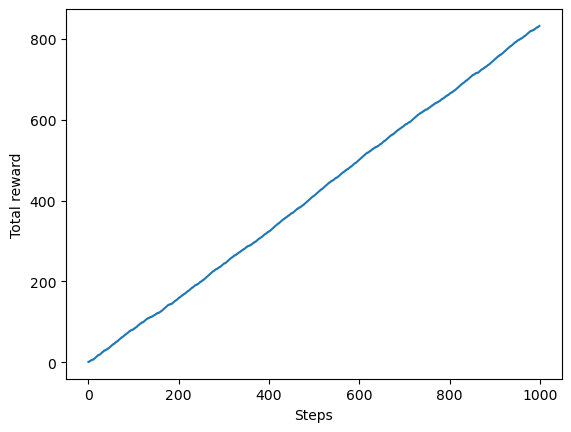

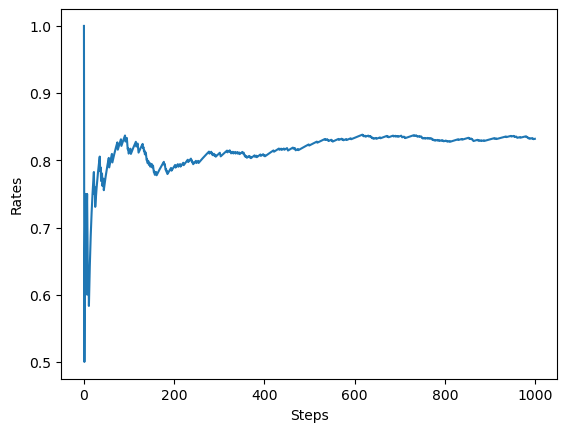

In [21]:
steps = 1000
epsilon = 0.1

bandit = Bandit()
agent = Agent(epsilon)
total_reward = 0
total_rewards = []
rates = []

for step in range(steps):
    action = agent.get_action()
    reward = bandit.play(action)
    agent.update(action, reward)
    total_reward += reward
    
    total_rewards.append(total_reward)
    rates.append(total_reward/(step+1))

print(total_reward)

plt.ylabel("Total reward")
plt.xlabel("Steps")
plt.plot(total_rewards)
plt.show()

plt.ylabel("Rates")
plt.xlabel("Steps")
plt.plot(rates)
plt.show()

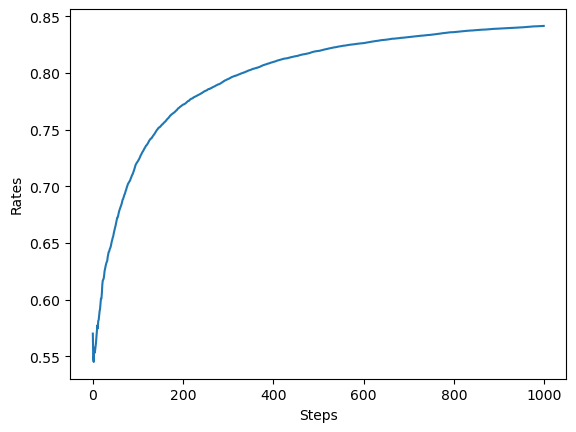

In [22]:
runs = 200
steps = 1000
epsilon = 0.1
all_rates = np.zeros((runs, steps))

for run in range(runs):
    bandit = Bandit()
    agent = Agent(epsilon)
    total_reward = 0
    rates = []
    
    for step in range(steps):
        action = agent.get_action()
        reward = bandit.play(action)
        agent.update(action, reward)
        total_reward += reward
        rates.append(total_reward/(step+1))
        
    all_rates[run] = rates
    
avg_rates = np.average(all_rates, axis=0)

plt.ylabel('Rates')
plt.xlabel('Steps')
plt.plot(avg_rates)
plt.show()